In [1]:
!pip install serpapi

In [2]:
!pip install requests beautifulsoup4 pandas serpapi


In [3]:
!pip install google-search-results

## The following code searches Google Scholar for articles on "carbon emission of AI," extracts the titles, descriptions, and URLs from the search results, and saves this information to a CSV file using serpapi

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from serpapi import GoogleSearch
import warnings

# Suppress warnings about character decoding issues
warnings.filterwarnings('ignore', message='Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.')

# Your SerpApi API key
SERP_API_KEY = "d99d2436d6ccbacb0d6625e19fd27496aa2e928bf5052449c00133b2a508c7d2"

# Define search parameters for Google Search
params = {
    "api_key": SERP_API_KEY,
    "engine": "google",
    "q": "carbon emission and data centers of AI",
    "hl": "en",
    "num": 10000
}

# Perform the search
try:
    search = GoogleSearch(params)
    results = search.get_dict()
    organic_results = results.get('organic_results', [])
except Exception as e:
    print(f"Error performing search: {e}")
    organic_results = []

# Extract URLs from search results
urls = [result.get('link') for result in organic_results if 'link' in result]

# Prepare a list to hold all articles
all_articles = []

# Extract data from each URL
for url in urls:
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        title_tag = soup.find('title')
        title = title_tag.get_text(strip=True) if title_tag else 'No Title'
        
        description_tag = soup.find('meta', attrs={'name': 'description'}) or soup.find('p')
        description = description_tag['content'] if description_tag and description_tag.has_attr('content') else description_tag.get_text(strip=True) if description_tag else 'No Description'

        article_info = {
            'title': title,
            'description': description,
            'url': url
        }
        all_articles.append(article_info)
    except requests.exceptions.RequestException:
        pass  # Suppress the error message and continue
    except Exception:
        pass  # Suppress the error message and continue

# Convert the list of articles to a DataFrame
df = pd.DataFrame(all_articles)

# Check if DataFrame is empty
if df.empty:
    print("No articles were successfully extracted.")
else:
    # Display the DataFrame
    print(df.head(20))

    # Save the DataFrame to a CSV file
    df.to_csv('carbon_emission_ai_articles.csv', index=False)
    print("Data saved to carbon_emission_ai_articles.csv")


                                                title  \
0   AI’s Growing Carbon Footprint – State of the P...   
1   As Use of A.I. Soars, So Does the Energy and W...   
2   AI's looming climate cost: Energy demand surge...   
3   AI is poised to drive 160% increase in data ce...   
4   Three Ways for Colocation Data Centers to Cut ...   
5   Microsoft's carbon emissions up 30% since 2020...   
6   The Role of AI in Developing Green Data Center...   
7   Artificial Intelligence Is Booming—So Is Its C...   
8   AI Datacenter Capacity, Energy Consumption, an...   
9   AI, Data Centers, and Energy Use: The Path to ...   
10  Microsoft's Emissions and Water Use Shoot Up a...   
11  AI’s Carbon Emissions Are About to Be a Proble...   
12  Energy Efficiency Using AI for Green Data Cent...   
13  Microsoft’s AI Push Imperils Climate Goal as C...   
14  AI's carbon footprint - how does the popularit...   
15  The true environmental impact of AI in the dat...   
16  AI emissions are fueling a 

In [6]:
print(df.head(80))

                                                title  \
0   AI’s Growing Carbon Footprint – State of the P...   
1   As Use of A.I. Soars, So Does the Energy and W...   
2   AI's looming climate cost: Energy demand surge...   
3   AI is poised to drive 160% increase in data ce...   
4   Three Ways for Colocation Data Centers to Cut ...   
..                                                ...   
70  Carbon Footprint of Data Centers & Data Storag...   
71  What are data centre carbon emissions? And wha...   
72  Quantum AI framework targets energy intensive ...   
73  Microsoft’s emissions soar by 30%: Why is it b...   
74  Renewable Energy Alone Can’t Address Data Cent...   

                                          description  \
0   Artificial intelligence has the potential to d...   
1   Generative artificial intelligence uses massiv...   
2   PALO ALTO, California -- Artificial intelligen...   
3                                                       
4   Discover three effective w

In [7]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'its', 'being', 'no', 'are', 'by', 'there', 'herself', 'm', 'have', "weren't", "needn't", 'she', 'mightn', 'more', "you're", 't', 'under', 'we', 'aren', 'after', 'doesn', 'out', 'our', 'where', 'than', 'during', 'other', 'these', 'will', 'from', 'ourselves', 'here', "don't", 'ours', 'about', 'you', 'with', 'yours', 'him', 'does', 'her', 'few', 'has', 'my', 'just', 'for', 'that', 'it', 'below', 'itself', 'how', 'not', 'at', 'shouldn', "hadn't", 'such', 'above', 'yourselves', 'too', 'own', 'all', 'hers', 'isn', 'his', 'wasn', 'yourself', "she's", 'ma', 'y', 'weren', "that'll", 'he', 'because', "aren't", "doesn't", "haven't", 'myself', 'whom', "isn't", 're', 'were', 'needn', 'into', 'haven', 'me', 'those', 'been', 'themselves', 'is', 'when', 'a', 'once', 'in', 'couldn', 'or', 'won', 'your', 'll', 'hadn', 'which', 'why', 'what', 'having', 'each', 'am', 'through', 'down', 'nor', "shan't", 'be', 'further', "hasn't", 'between', 'the', 'up', 'o', 'hasn', 'an', 'same', 'can', 'do', 'some', "mu

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [9]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [10]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [11]:
df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)

In [12]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
ai,59
data,48
carbon,32
centers,27
|,25
energy,19
footprint,18
emissions,17
climate,11


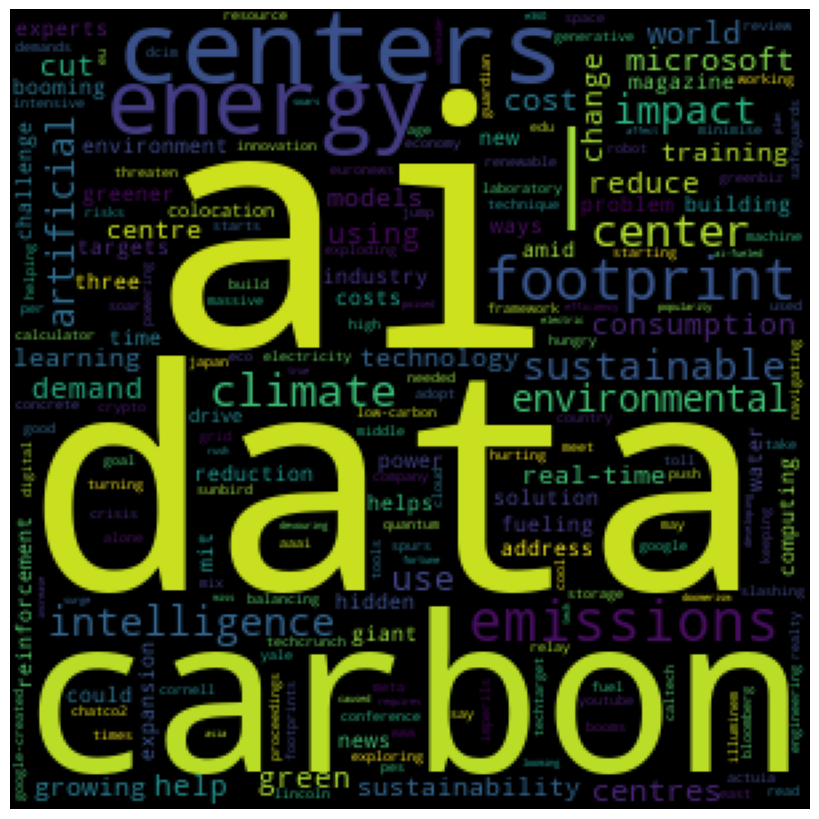

In [28]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='black', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

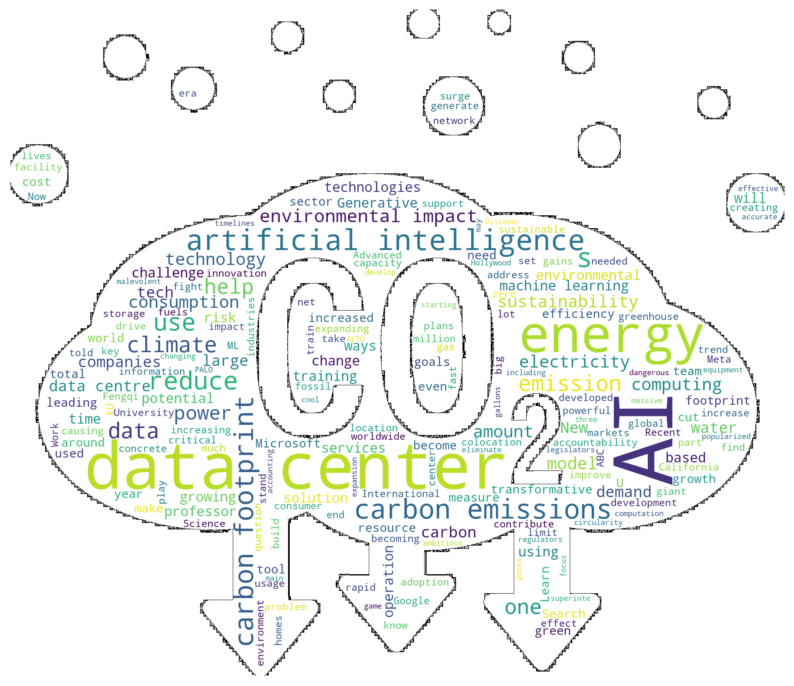

In [15]:
import numpy as np
from PIL import Image, ImageOps
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df['description'] contains text data

# Combine all descriptions into a single string
text = " ".join(description for description in df.description)

# Load mask image
mask_image = np.array(Image.open('sh1.jpg'))

# Convert mask image to have an ash color background
ash_color = (169, 169, 169)  # Define ash color
mask_with_ash_bg = Image.new("RGB", (mask_image.shape[1], mask_image.shape[0]), ash_color)
mask_with_ash_bg.paste(Image.fromarray(mask_image), (0, 0), Image.fromarray(mask_image))

# Convert the image to grayscale for the mask
mask_with_ash_bg = mask_with_ash_bg.convert("L")
mask_with_ash_bg = np.array(mask_with_ash_bg)

# Generate word cloud with vibrant colors
wordcloud = WordCloud(
    background_color='white',  # Background color for areas outside the mask
    mask=mask_image,
    contour_color='black',  # Optional: contour color for the shape
    contour_width=1,  # Optional: contour width for the shape
    colormap='viridis'
).generate(text)

# Display the word cloud
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [14]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
ai,60,23.528185
data,47,28.708804
carbon,32,30.456071
centers,27,30.284584
|,25,30.985857


# sentiment analysis

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['title'].apply(getSubjectivity)
df['Polarity'] = df['title'].apply(getPolarity)

#Now display data
df.head()

,title,description,url,tokens,Subjectivity,Polarity
0,AI’s Growing Carbon Footprint – State of the P...,Artificial intelligence has the potential to d...,https://news.climate.columbia.edu/2023/06/09/a...,"[ai, growing, carbon, footprint, state, planet]",0.0,0.0
1,"As Use of A.I. Soars, So Does the Energy and W...",Generative artificial intelligence uses massiv...,https://e360.yale.edu/features/artificial-inte...,"[use, soars, energy, water, requires, yale, e360]",0.0,0.0
2,AI's looming climate cost: Energy demand surge...,"PALO ALTO, California -- Artificial intelligen...",https://asia.nikkei.com/Spotlight/The-Big-Stor...,"[ai, looming, climate, cost, energy, demand, s...",0.1,-0.1
3,AI is poised to drive 160% increase in data ce...,,https://www.goldmansachs.com/intelligence/page...,"[ai, poised, drive, increase, data, center, po...",0.1,-0.1
4,Three Ways for Colocation Data Centers to Cut ...,Discover three effective ways for colocation d...,https://blog.se.com/sustainability/2024/05/23/...,"[three, ways, colocation, data, centers, cut, ...",0.0,0.0


In [17]:
# Function to categorize polarity
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(10)

,title,description,url,tokens,Subjectivity,Polarity,Insight
0,AI’s Growing Carbon Footprint – State of the P...,Artificial intelligence has the potential to d...,https://news.climate.columbia.edu/2023/06/09/a...,"[ai, growing, carbon, footprint, state, planet]",0.0000,0.0000,neutral
1,"As Use of A.I. Soars, So Does the Energy and W...",Generative artificial intelligence uses massiv...,https://e360.yale.edu/features/artificial-inte...,"[use, soars, energy, water, requires, yale, e360]",0.0000,0.0000,neutral
2,AI's looming climate cost: Energy demand surge...,"PALO ALTO, California -- Artificial intelligen...",https://asia.nikkei.com/Spotlight/The-Big-Stor...,"[ai, looming, climate, cost, energy, demand, s...",0.1000,-0.1000,Negative
3,AI is poised to drive 160% increase in data ce...,,https://www.goldmansachs.com/intelligence/page...,"[ai, poised, drive, increase, data, center, po...",0.1000,-0.1000,Negative
4,Three Ways for Colocation Data Centers to Cut ...,Discover three effective ways for colocation d...,https://blog.se.com/sustainability/2024/05/23/...,"[three, ways, colocation, data, centers, cut, ...",0.0000,0.0000,neutral
5,Microsoft's carbon emissions up 30% since 2020...,The expansion of data centers poses a challeng...,https://www.cnbc.com/2024/05/15/microsofts-car...,"[microsoft, carbon, emissions, since, due, dat...",0.2375,-0.1125,Negative
6,The Role of AI in Developing Green Data Center...,"In an era where sustainability is the focus, g...",https://www.dataversity.net/the-role-of-ai-in-...,"[role, ai, developing, green, data, centers, d...",0.3000,-0.2000,Negative
7,"AI Datacenter Capacity, Energy Consumption, an...","IDC examines consumer markets by devices, appl...",https://www.idc.com/getdoc.jsp?containerId=US5...,"[ai, datacenter, capacity, energy, consumption...",0.0000,0.0000,neutral
8,Artificial Intelligence Is Booming—So Is Its C...,AI uses more energy than other forms of comput...,https://www.datacenterknowledge.com/ai-data-ce...,"[artificial, intelligence, booming, carbon, fo...",1.0000,-0.6000,Negative
9,"AI, Data Centers, and Energy Use: The Path to ...",The increasing use of AI and data centers is l...,https://www.informationweek.com/sustainability...,"[ai, data, centers, energy, use, path, sustain...",0.0000,0.0000,neutral


### The code plots a bar chart showing the count of different sentiment scores from the "Insight" column of the DataFrame, with the chart titled "carbon emission Sentiment Score".

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

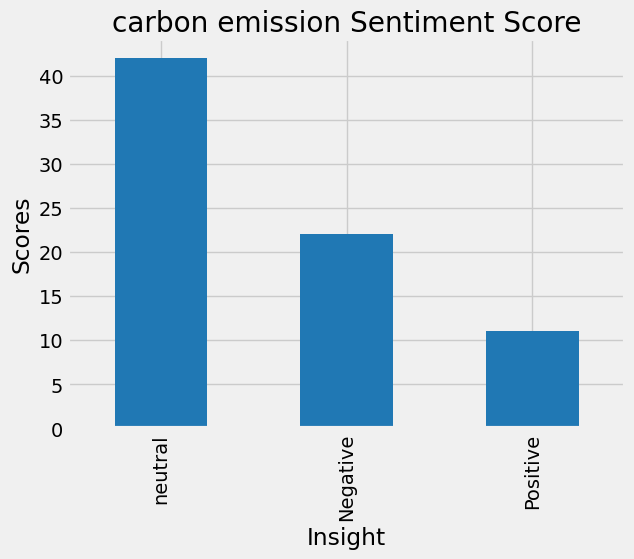

In [19]:
#Plot the values count of sentiment
plt.title("carbon emission Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## topic modeling

In [20]:
!pip install pyLDAvis

In [21]:
import gensim
from gensim import corpora
import pandas as pd
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [22]:
dictionary = corpora.Dictionary(df['tokens'])

# Filter out words that occur in less than 3 documents or more than 50% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.5)

# Create a corpus object
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Visualization using pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_display, 'lda_visualization2.html')

# Open the HTML file in a browser
import webbrowser
webbrowser.open('lda_visualization2.html')

(0, '0.118*"intelligence" + 0.104*"sustainable" + 0.103*"artificial" + 0.083*"carbon" + 0.083*"centers"')
(1, '0.330*"climate" + 0.116*"change" + 0.096*"|" + 0.089*"technology" + 0.069*"centers"')
(2, '0.280*"carbon" + 0.239*"footprint" + 0.096*"learning" + 0.075*"|" + 0.059*"training"')
(3, '0.227*"energy" + 0.144*"centers" + 0.086*"|" + 0.082*"center" + 0.074*"use"')
(4, '0.216*"emissions" + 0.148*"carbon" + 0.086*"|" + 0.076*"centers" + 0.066*"microsoft"')


True